In [53]:
import numpy as np
import matplotlib.pyplot as plt



In [54]:
#read data.npy
data = np.load('data.npy')
x = data[0]
y = data[1]

In [ ]:
print(f"Data shape: {data.shape}")
print(f"First element of x: {x[0][0]}")
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

(2, 100, 1)


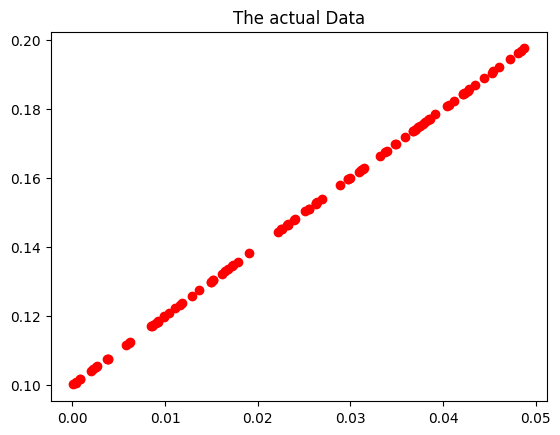

In [92]:
plt.figure()
plt.title('The actual Data')
plt.plot(x, y, 'ro')

In [85]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]

# Initialize weights and bias for a single-layer perceptron
input_dim = x.shape[1]  # Number of features
output_dim = 1  # We have one output (regression task)

# Weights and bias initialization (random values)
weights = np.random.randn(input_dim, output_dim) * 0.01
bias = np.zeros((1, 1))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative (for backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Define training parameters
learning_rate = 0.05
epochs = 500000

# Training loop
for epoch in range(epochs):
    # Forward pass
    z = np.dot(x, weights) + bias  # Linear combination
    predictions = sigmoid(z)  # Sigmoid activation
    
    # Compute loss (Mean Squared Error)
    loss = np.mean((predictions - y) ** 2)
    
    # Backward pass
    d_loss = 2 * (predictions - y) # Gradient of Mean Squared Error
    d_predictions = d_loss * sigmoid_derivative(predictions)  # Gradient of sigmoid

    # Update weights and bias using the gradients
    weights -= learning_rate * np.dot(x.T, d_predictions)
    bias -= learning_rate * np.sum(d_predictions, axis=0, keepdims=True)
    
    # Print loss every 500 epochs
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

# Final weights and biases
print("\nFinal Model Parameters:")
print("Weights:", weights)
print("Bias:", bias)

# Test the model
test_predictions = sigmoid(np.dot(x, weights) + bias)
print("\nPredictions (first 5 samples):", test_predictions[:5].flatten())


Epoch 1000/500000, Loss: 0.000781608663359826
Epoch 2000/500000, Loss: 0.0007309539327195751
Epoch 3000/500000, Loss: 0.0006835809607947573
Epoch 4000/500000, Loss: 0.0006392882726006428
Epoch 5000/500000, Loss: 0.0005978844408433898
Epoch 6000/500000, Loss: 0.0005591879973593675
Epoch 7000/500000, Loss: 0.00052302726319803
Epoch 8000/500000, Loss: 0.0004892401139539181
Epoch 9000/500000, Loss: 0.00045767369477718166
Epoch 10000/500000, Loss: 0.0004281840974775831
Epoch 11000/500000, Loss: 0.00040063601029998987
Epoch 12000/500000, Loss: 0.00037490234929573105
Epoch 13000/500000, Loss: 0.00035086387874221303
Epoch 14000/500000, Loss: 0.0003284088267659411
Epoch 15000/500000, Loss: 0.000307432501191309
Epoch 16000/500000, Loss: 0.00028783690965665873
Epoch 17000/500000, Loss: 0.00026953038719659844
Epoch 18000/500000, Loss: 0.0002524272337715628
Epoch 19000/500000, Loss: 0.00023644736361833277
Epoch 20000/500000, Loss: 0.00022151596778570795
Epoch 21000/500000, Loss: 0.00020756319079541

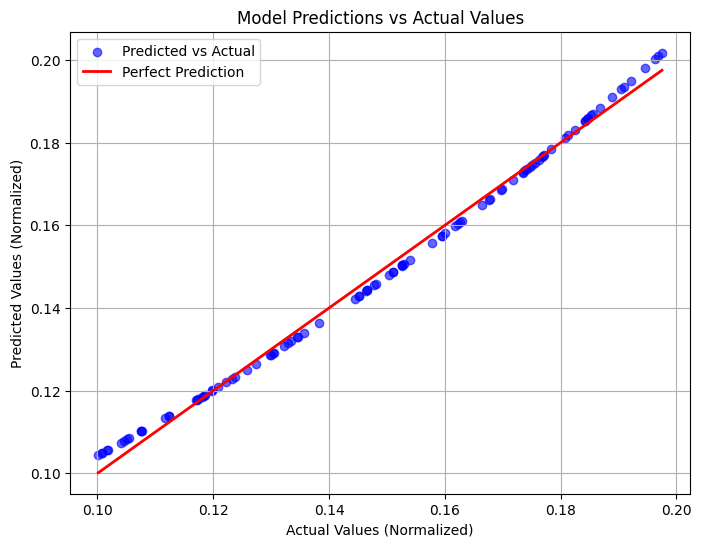

In [86]:
y_pred = sigmoid(weights * x + bias)
# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
#plot the perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2, label="Perfect Prediction")
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Actual Values (Normalized)")
plt.ylabel("Predicted Values (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

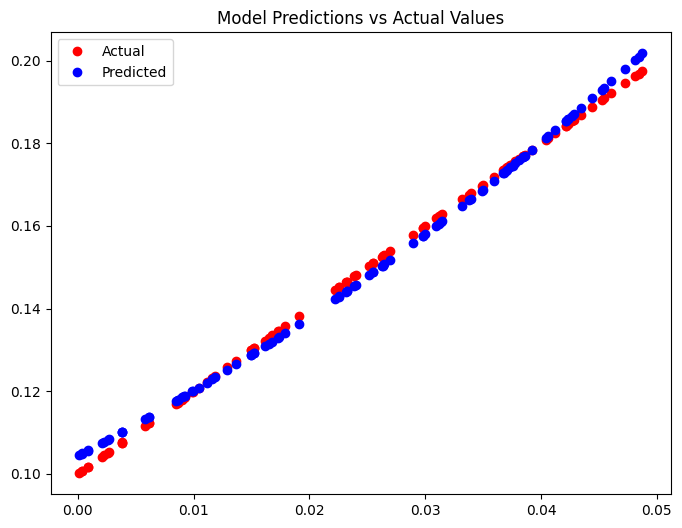

In [91]:
plt.figure(figsize=(8, 6))
plt.title("Model Predictions vs Actual Values")
plt.plot(x, y, 'ro')
plt.plot(x, y_pred, 'bo')
plt.legend(["Actual", "Predicted"])
plt.show()


In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]


# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the Multi-Layer Perceptron (MLP)
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim):
        super(MultiLayerPerceptron, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_dim, 1)  # Input layer to hidden layer 1 (64 neurons)
        self.activation = nn.Sigmoid()      # Sigmoid activation for regression output
    
    def forward(self, x):
        x = self.activation(self.fc1(x))   # Apply Sigmoid for output layer
        return x

# Model parameters
input_dim = x.shape[1]  # Number of features
model = MultiLayerPerceptron(input_dim)

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer for better learning

# Training loop
epochs = 50000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x_tensor)
    
    # Compute loss
    loss = criterion(predictions, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 500 epochs
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Final weights and biases
print("\nFinal Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# Test the model
with torch.no_grad():
    test_predictions = model(x_tensor)
    print("\nPredictions (first 5 samples):", test_predictions[:5].numpy())


Epoch 1000/50000, Loss: 0.04575631022453308
Epoch 2000/50000, Loss: 0.010635423474013805
Epoch 3000/50000, Loss: 0.002804557094350457
Epoch 4000/50000, Loss: 0.0011882235994562507
Epoch 5000/50000, Loss: 0.0009346357546746731
Epoch 6000/50000, Loss: 0.0008864671690389514
Epoch 7000/50000, Loss: 0.0008374522440135479
Epoch 8000/50000, Loss: 0.000772555940784514
Epoch 9000/50000, Loss: 0.0006961989565752447
Epoch 10000/50000, Loss: 0.0006156486342661083
Epoch 11000/50000, Loss: 0.0005365466931834817
Epoch 12000/50000, Loss: 0.00046182156074792147
Epoch 13000/50000, Loss: 0.0003926744975615293
Epoch 14000/50000, Loss: 0.00032951607136055827
Epoch 15000/50000, Loss: 0.0002724395308177918
Epoch 16000/50000, Loss: 0.00022141174122225493
Epoch 17000/50000, Loss: 0.00017634221876505762
Epoch 18000/50000, Loss: 0.00013710731582250446
Epoch 19000/50000, Loss: 0.00010355442645959556
Epoch 20000/50000, Loss: 7.550003647338599e-05
Epoch 21000/50000, Loss: 5.2721261454280466e-05
Epoch 22000/50000, L

Model Performance on Training Data:
Mean Squared Error (MSE): 0.0000
R-squared (R²): 0.9952


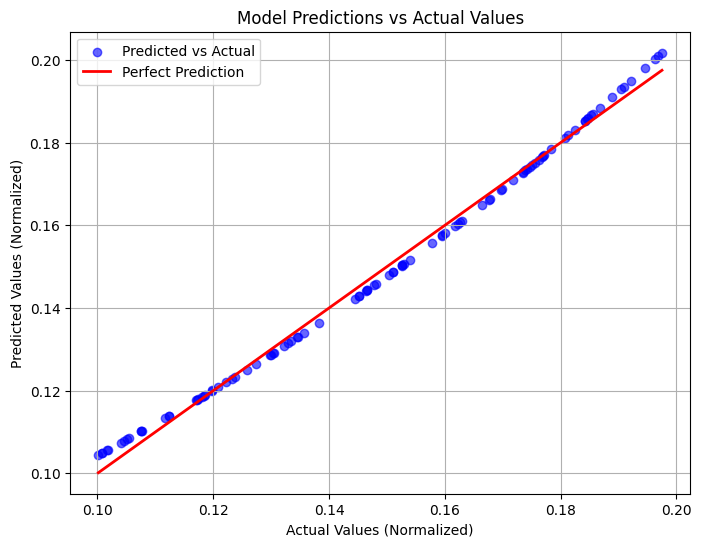

Prediction for first sample: 0.1870
Actual value for first sample: 0.1857


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on the training data
with torch.no_grad():
    y_pred = model(x_tensor)  # Predictions on the training data
    y_pred_np = y_pred.numpy()  # Convert predictions to NumPy
    y_true_np = y_tensor.numpy()  # Convert actual values to NumPy

# Calculate performance metrics
mse = mean_squared_error(y_true_np, y_pred_np)  # Mean Squared Error
#r2 = r2_score(y_true_np, y_pred_np)            # R-squared score

# Print performance metrics
print("Model Performance on Training Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
#print(f"R-squared (R²): {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_true_np, y_pred_np, color="blue", alpha=0.6, label="Predicted vs Actual")
#plot the perfect prediction line
plt.plot([y_true_np.min(), y_true_np.max()], [y_true_np.min(), y_true_np.max()], color="red", linewidth=2, label="Perfect Prediction")
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Actual Values (Normalized)")
plt.ylabel("Predicted Values (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Example: Testing on a single sample
single_sample = x_tensor[0].unsqueeze(0)  # Select the first sample and add batch dimension
with torch.no_grad():
    single_prediction = model(single_sample)
print(f"Prediction for first sample: {single_prediction.item():.4f}")
print(f"Actual value for first sample: {y_tensor[0].item():.4f}")
